# Modelo Diferencial para a História Térmica do Universo

**Nomes:** Bruna Guedes Pereira e Mariana Melo Pereira

## Introdução

A radiação cósmica de fundo (CMB) é um importante tópico de estudo da cosmologia, representando a luz remanescente do universo primitivo. Desde a época da recombinação, quando a temperatura era da ordem de 3000 K, essa radiação vem se resfriando devido à expansão do universo, atingindo atualmente cerca de 2,725 K. Compreender essa evolução térmica é essencial para interpretar a história do cosmos e validar modelos cosmológicos.

Neste trabalho, propomos uma abordagem baseada em equações diferenciais ordinárias (EDOs) para modelar a variação da temperatura da CMB ao longo do tempo. Inicialmente, consideramos um modelo simplificado em que a taxa de expansão do universo é constante, levando a uma equação diferencial linear homogênea cuja solução descreve um decaimento exponencial da temperatura. 

$$\frac{dT}{dt} = -H_0 T$$

onde $H_0$ é a taxa de expansão constante e $T$ a temperatura.

Em seguida, introduzimos um segundo modelo que inclui um termo adicional para representar o acoplamento inicial entre radiação e matéria antes do desacoplamento, tornando a equação não homogênea.

$$\frac{dT}{dt} = -H_0 T + k_m n_0 e^{-t/\tau}$$

onde $H_0$ é a taxa de expansão constante, $T$ a temperatura, $k_m$ a constante de desacoplamento e $n_0 e^{-t/\tau}$ a densidade de elétrons decaindo.

Além da solução analítica obtida pelo método dos coeficientes constantes, aplicamos métodos numéricos como Euler e Runge-Kutta (RK4) para resolver as EDOs e comparar a precisão das abordagens. Gráficos comparativos são apresentados para ilustrar como o modelo descreve a evolução térmica do universo sob diferentes métodos de solução.

## Código para a solução do modelo proposto

Vamos iniciar o nosso código importando as bibliotecas para os cálculos e representações gráficas, mais especificamente as bibliotecas `numpy` e `matplotlib`.

### Importação das bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Posteriormente, é necessário declarar as constantes a serem utilizadas para o nosso modelo de Equação Diferencial Ordinária.

### Definição das constantes do modelo

Retomando o nosso modelo $\frac{dT}{dt} = -H_0 T + k_m n_0 e^{-t/\tau}$, admitimos que:

- $H_0 = 7.16 \times 10^{-11}$, a taxa de Hubble em 1/ano
- $k_m = 10^{-5}$ será o valor suposto para a constante de acoplamento
- $n_0 = 10^{-3}$ será o valor suposto para a densidade inicial do Universo
- $\tau = 10^5$ é o tempo de desacoplamento (em anos)

In [2]:
H0 = 7.16e-11  # taxa de Hubble em 1/ano
T0 = 3000      # temperatura inicial em K
km = 1e-5      # constante de acoplamento (valor arbitrário)
n0 = 1e-3      # densidade inicial (valor arbitrário)
tau = 1e5      # tempo de desacoplamento em anos

Referente ao tempo, definimos as constantes:

- $t_0 = 0$ é o momento inicial
- $t_\text{final} = 1.38 \times 10^{10}$ é a idade aproximada do Universo em anos

In [3]:
# Intervalo de tempo (em anos)
t0 = 0
t_final = 1.38e10  # idade do universo ~13,8 bilhões de anos

Por fim, vamos definir o passo de integração como $10^7$ em anos.

In [4]:
h = 1e7           # passo de integração (10 milhões de anos)

### Definição das funções

Para auxiliar em nossos cálculos, vamos definir duas funções: `f(t, T)` e `runge_kutta(f, t0, T0, t_final, h)`.

A primeira representa o nosso Modelo Diferencial: $\frac{dT}{dt} = -H_0 T + k_m n_0 e^{-t/\tau}$. Ela receberá como argumentos valores para tempo e para temperatura.

In [5]:
# Função da EDO
def f(t, T):
    return -H0 * T + km * n0 * np.exp(-t / tau)

Já a segunda será a responsável por calcular a aproximação da nossa solução por meio do Método de Runge-Kutta de quarta ordem. Ela recebe cinco parâmetros principais:

*   `f`: é a função que define a EDO, ou seja, a taxa de variação $\frac{dT}{dt}$ em função do tempo $t$ e da variável $T$.
*   `t0`: o instante inicial da integração, onde começa o cálculo.
*   `T0`: o valor inicial da variável dependente $T$ no tempo $t_0$.
*   `t_final`: o instante final até onde a solução será calculada.
*   `h`: o passo de integração, que determina o intervalo entre os pontos calculados. Um passo menor aumenta a precisão, mas também o número de cálculos.

Dentro da função, são criadas listas para armazenar os valores de tempo e da solução. Em cada iteração, o método calcula quatro estimativas da derivada (k1, k2, k3, k4) em pontos intermediários do intervalo, combinando-as para obter uma aproximação mais precisa do próximo valor de (T). Esse processo se repete até atingir o tempo final, e no fim a função retorna dois arrays: um com os tempos e outro com os valores da solução.

Cada um dos termos k1, k2, k3 e k4 no método de Runge-Kutta representa uma estimativa da derivada $\frac{dT}{dt}$ em diferentes pontos dentro do intervalo de integração, para melhorar a precisão do cálculo do próximo valor de $T$:

*   k1: é a derivada calculada no início do intervalo, no ponto $(t, T)$. Ele indica a inclinação inicial da curva.  
    $$k_1 = f(t, T)$$

*   k2: é a derivada calculada no meio do intervalo, usando um passo de meia distância e ajustando $T$ com metade do incremento baseado em k1. Isso dá uma ideia da inclinação no meio do caminho.  
    $$k_2 = f\big(t + \frac{h}{2}, T + \frac{h k_1}{2}\big)$$

*   k3: também é calculado no meio do intervalo, mas agora usando k2 para ajustar $T$. Ele refina a estimativa da inclinação intermediária.  
    $$k_3 = f\big(t + \frac{h}{2}, T + \frac{h k_2}{2}\big)$$

*   k4: é a derivada calculada no final do intervalo, no ponto $(t + h, T + h k_3)$. Isso indica a inclinação no final do passo.  
    $$k_4 = f(t + h, T + h k_3)$$

Essas quatro estimativas são combinadas ponderadamente:
$$T_{\text{novo}} = T + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$
Esse peso dá mais importância às inclinações intermediárias (k2 e k3), porque elas geralmente representam melhor a tendência da curva dentro do intervalo.

In [6]:
# Método de Runge-Kutta de quarta ordem (RK4)
def runge_kutta(f, t0, T0, t_final, h):
    t_values = [t0]
    T_values = [T0]
    t = t0
    T = T0
    while t < t_final:
        k1 = f(t, T)
        k2 = f(t + h/2, T + h*k1/2)
        k3 = f(t + h/2, T + h*k2/2)
        k4 = f(t + h, T + h*k3)
        T = T + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t += h
        t_values.append(t)
        T_values.append(T)
    return np.array(t_values), np.array(T_values)

### Resolvendo a Equação Diferencial Ordinal pelo Método de Range-Kutta

Agora que temos as funções necessárias definidas, podemos calcular os valores de temperatura ao longo de cada instante de tempo, passando como argumentos as constantes anteriormente definidas. Depois, para facilitar a visualização gráfica dos resultados, convertemos o tempo para bilhões de anos.

In [7]:
# Resolver a EDO
t_values, T_values = runge_kutta(f, t0, T0, t_final, h)

# Converter tempo para bilhões de anos
t_values_gyr = t_values / 1e9

Que tal observar o comportamento da evolução da temperatura da Radiação Cósmica de Fundo ao longo do tempo?

### Visualização gráfica dos resultados

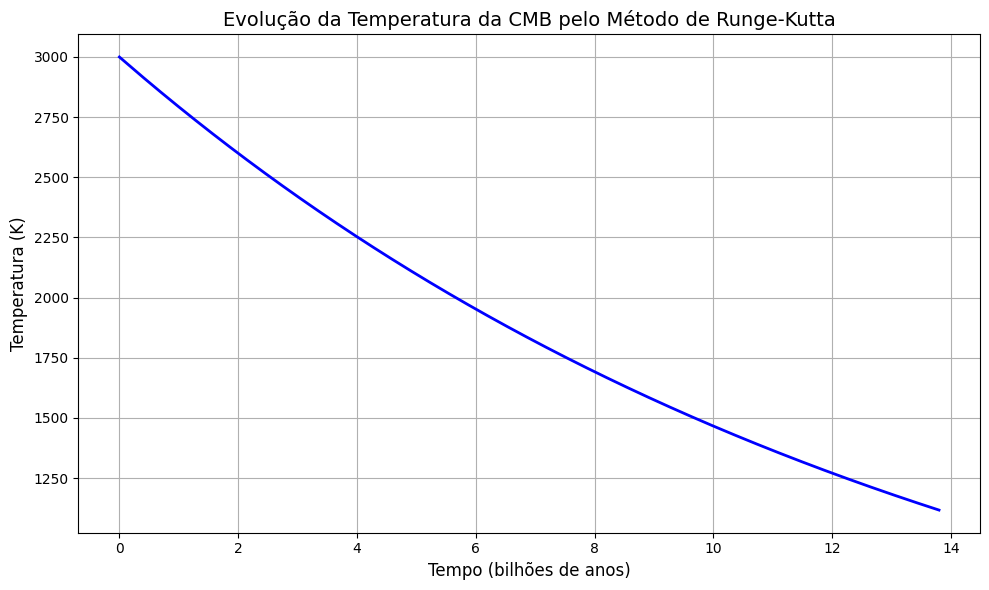

In [20]:
# Plotar com Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(t_values_gyr, T_values, color='blue', linewidth=2)
plt.title('Evolução da Temperatura da CMB pelo Método de Runge-Kutta', fontsize=14)
plt.xlabel('Tempo (bilhões de anos)', fontsize=12)
plt.ylabel('Temperatura (K)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('runge_kutta.png')
plt.show()

Olha só! Uma exponencial decrescente! E se comparássemos esse resultado com o cálculo da solução analítica?

### Comparando com a solução analítica (Método dos Coeficientes Constantes)

Pelo Método dos Coeficientes Constantes, chegamos na expressão $$T(t) = (T_0 - A)e^{-H_0t} + Ae^{-t/\tau}, \text{onde A = } \frac{k_mn_0}{H_0 - \frac{1}{\tau}}$$

Aplicando essa equação para todos os valores de tempo, conseguimos visualizar a evolução da temperatura ao longo do tempo.

In [9]:
# Solução analítica pelo método dos coeficientes constantes
A = (km * n0) / (H0 - 1/tau)
T_analitica = (T0 - A) * np.exp(-H0 * t_values) + A * np.exp(-t_values / tau)

Agora, conseguimos representar essa evolução graficamente!

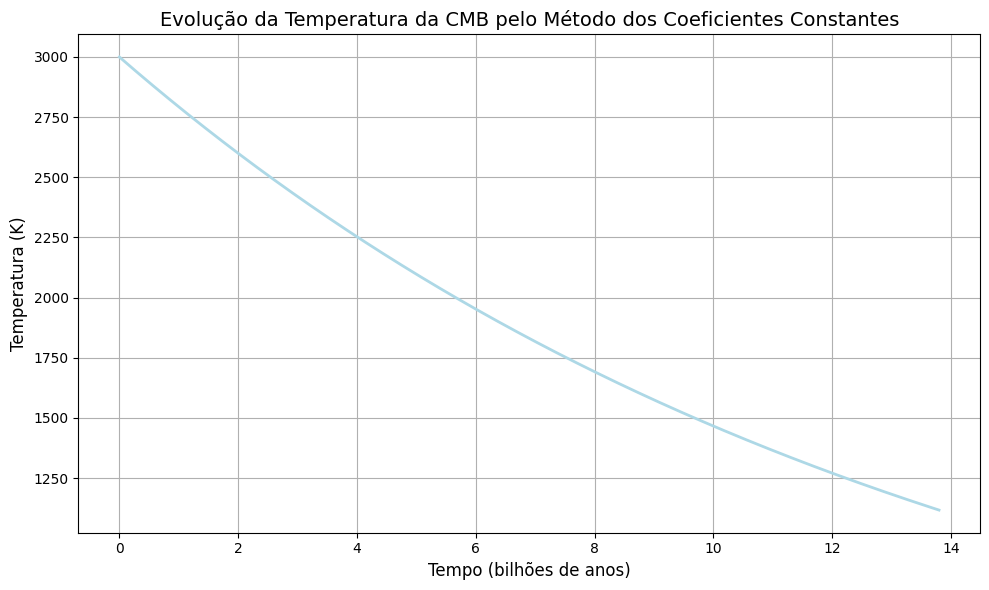

In [19]:
# Plotar com Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(t_values_gyr, T_analitica, color='lightblue', linewidth=2)
plt.title('Evolução da Temperatura da CMB pelo Método dos Coeficientes Constantes', fontsize=14)
plt.xlabel('Tempo (bilhões de anos)', fontsize=12)
plt.ylabel('Temperatura (K)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('coeficientes_constantes.png')
plt.show()

E se quisermos comparar visualmente as soluções pelo Método de Runge-Kutta e analítica? Vamos plotar um gráfico com os resultados das duas funções.

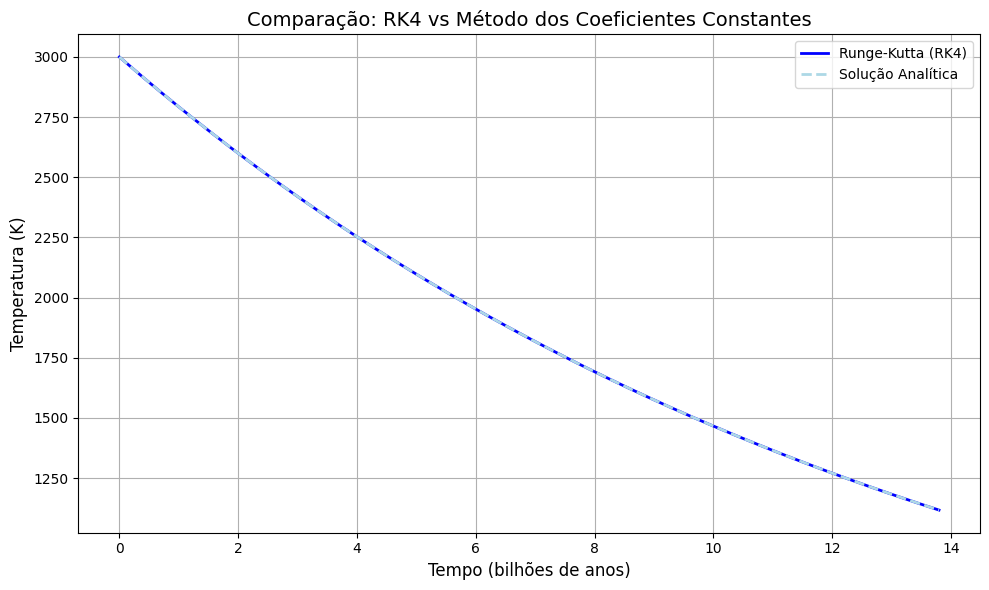

In [21]:
# Plotar comparação
plt.figure(figsize=(10, 6))
plt.plot(t_values_gyr, T_values, color='blue', linewidth=2, label='Runge-Kutta (RK4)')
plt.plot(t_values_gyr, T_analitica, color='lightblue', linestyle='--', linewidth=2, label='Solução Analítica')
plt.title('Comparação: RK4 vs Método dos Coeficientes Constantes', fontsize=14)
plt.xlabel('Tempo (bilhões de anos)', fontsize=12)
plt.ylabel('Temperatura (K)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('comparacao_metodos.png')
plt.show()

## Resultados e Discussões

A comparação entre a solução analítica obtida pelo método dos coeficientes constantes e a aproximação numérica pelo método de Runge-Kutta evidencia a consistência do modelo proposto. A solução analítica fornece uma expressão exata que descreve a evolução da temperatura como a soma de dois termos exponenciais, permitindo interpretar fisicamente cada contribuição: o primeiro associado à expansão do universo e o segundo à interação com partículas. Por outro lado, o método de Runge-Kutta, aplicado à mesma equação diferencial, apresenta resultados praticamente coincidentes com a solução analítica quando utilizamos passos adequados, confirmando sua precisão e confiabilidade.

A principal vantagem da solução analítica é a clareza conceitual e a possibilidade de avaliar diretamente o impacto dos parâmetros $H_0$, $\tau$, $k_m$ e $n_0$. Já a abordagem numérica se destaca pela flexibilidade, permitindo tratar casos mais complexos em que a solução exata não é viável, como quando os coeficientes deixam de ser constantes ou surgem termos adicionais. Assim, a análise conjunta demonstra que ambas as técnicas são complementares: a solução analítica é ideal para cenários simplificados e interpretação física, enquanto o método de Runge-Kutta é indispensável para simulações cosmológicas mais realistas.

## Conclusões
A análise comparativa entre a solução analítica, obtida pelo método dos coeficientes constantes, e a aproximação numérica pelo método de Runge-Kutta evidencia a consistência do modelo proposto para a evolução da temperatura da radiação cósmica de fundo. A solução analítica apresenta uma forma explícita que permite interpretar fisicamente os dois termos principais: o primeiro, associado à expansão do universo, decai exponencialmente com a taxa $H_0$; o segundo, relacionado ao termo de interação, decai com a constante de tempo $\tau$. Essa clareza conceitual é fundamental para compreender a influência dos parâmetros cosmológicos.
Por outro lado, a aproximação numérica pelo método de Runge-Kutta mostrou-se altamente precisa, reproduzindo os resultados analíticos quando utilizado um passo adequado. Sua principal vantagem é a flexibilidade, permitindo resolver equações mais complexas, onde a solução exata não é viável, como em cenários com coeficientes variáveis ou termos adicionais. Assim, concluímos que ambas as abordagens são complementares: a solução analítica é ideal para interpretação física e validação teórica, enquanto o método numérico é indispensável para simulações cosmológicas mais realistas.